In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

housing_factor = pd.read_pickle("housing_factor.pkl")
housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor  = housing_factor.drop(['PID'], axis=1)
housing_factor = housing_factor.apply(label_encoder.fit_transform)
housing_factor

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,...,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,...,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,...,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,...,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,...,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,...,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,...,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,...,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,...,1,0,5,5,1,3,4,1,9,4


In [2]:
SalePrice = housing_numeric.iloc[:, 3]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(housing_factor, SalePrice, test_size=0.2, random_state=0)

In [4]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [5]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
get_error(X_train,y_train,X_test,y_test,tree_model)

The training error is: 0.00484
The test     error is: 0.79845


[0.004844961240310086, 0.7984496124031008]

In [6]:
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)

grid_search_tree.fit(X_train, y_train)

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': range(1, 31)}], return_train_score=True,
             scoring='accuracy')

In [7]:
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]

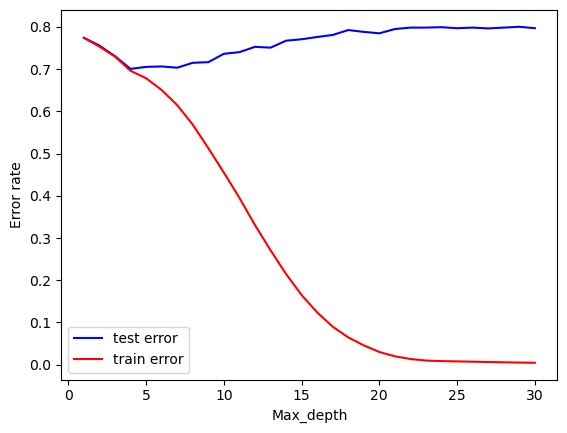

In [8]:
plt.plot(range(1,31), test_error_range,
        c='blue', label='test error')
plt.plot(range(1,31), train_error_range,
        c='red', label='train error')
plt.xlabel('Max_depth')
plt.ylabel('Error rate')
plt.legend()
plt.show()

Text(0.5, 0, 'depth')

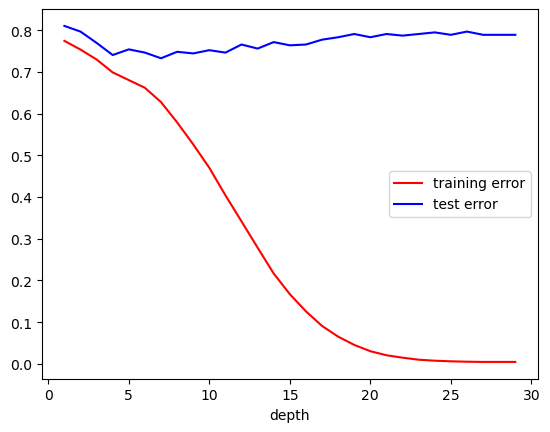

In [9]:
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    error = get_error(X_train, y_train, X_test, y_test, tree_model, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])


plt.plot(depth, tree_train, c = 'red', label='training error')
plt.plot(depth, tree_test, c = 'blue', label='test error')
plt.legend(loc=7)
plt.xlabel('depth')

In [10]:
grid_search_tree.best_estimator_
grid_search_tree.best_score_ 
grid_search_tree.best_params_

{'max_depth': 4}

In [11]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy').fit(X_train, y_train)
print('The best score is %.4f' %grid_search_tree.best_score_)
print('The training error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_test, y_test)))

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The best score is 0.3115
The training error is 0.6720
The testing error is 0.7403


In [12]:
print('Best parameters: '+ str(grid_search_tree.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5}


In [13]:
tree_final = grid_search_tree.best_estimator_
feature_importance = pd.Series(tree_final.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_importance

BldgType         0.220733
Neighborhood     0.169119
GarageType       0.151015
LotShape         0.149102
LotConfig        0.078949
Foundation       0.040456
MSZoning         0.033219
OverallQual      0.029994
Exterior2nd      0.027191
FireplaceQu      0.021375
Exterior1st      0.019959
BsmtFinType1     0.015255
RoofStyle        0.012458
LandContour      0.012330
HouseStyle       0.008114
MasVnrType       0.005776
KitchenQual      0.004953
MSSubClass       0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
Functional       0.000000
GarageQual       0.000000
GarageFinish     0.000000
CentralAir       0.000000
GarageCond       0.000000
PavedDrive       0.000000
PoolQC           0.000000
Fence            0.000000
MiscFeature      0.000000
SaleType         0.000000
Electrical       0.000000
BsmtQual         0.000000
HeatingQC        0.000000
Heating          0.000000
BsmtFinType2     0.000000
BsmtExposure     0.000000
BsmtCond         0.000000
ExterCond        0.000000
ExterQual   

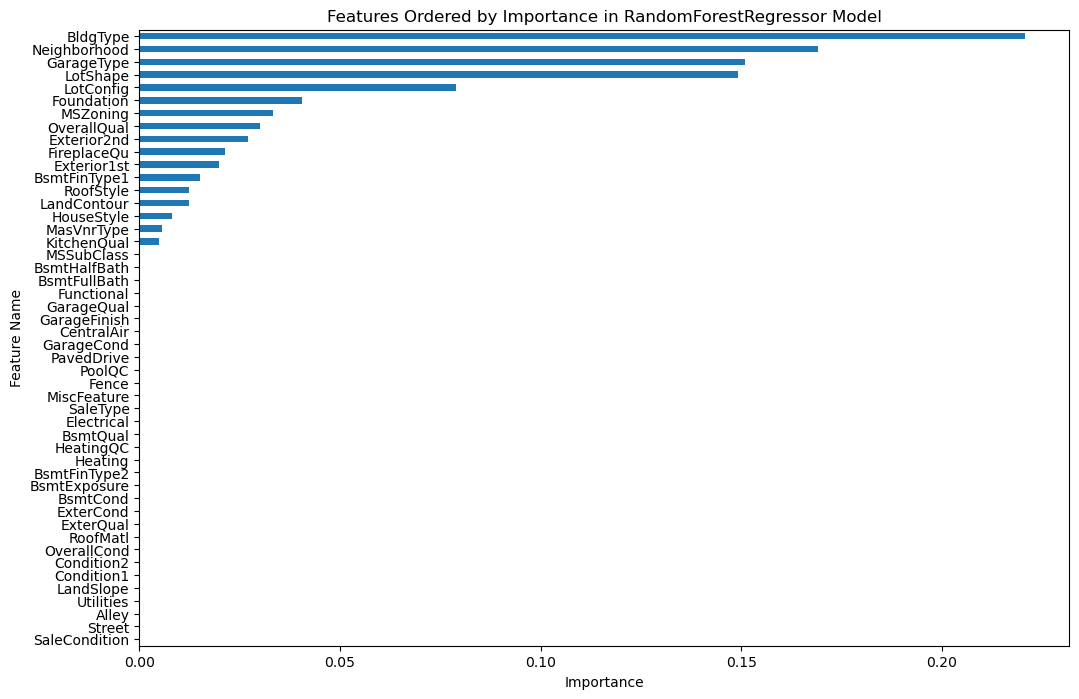

In [14]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title(f'Features Ordered by Importance in RandomForestRegressor Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 

In [15]:
from sklearn import ensemble 
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train))) 
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.00484
The test     error is: 0.70155


In [16]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [17]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CPU times: total: 5.09 s
Wall time: 4min 19s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='accuracy')

In [18]:
grid_search_forest.best_params_

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 80}

In [19]:
grid_search_forest.best_score_

0.34786783892428125

In [20]:
print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The training error is: 0.14099
The test     error is: 0.69767


In [1]:
best_estimator = grid_search_forest.best_estimator_
feature_importance = pd.Series(best_estimator.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_importance[:5]

NameError: name 'grid_search_forest' is not defined

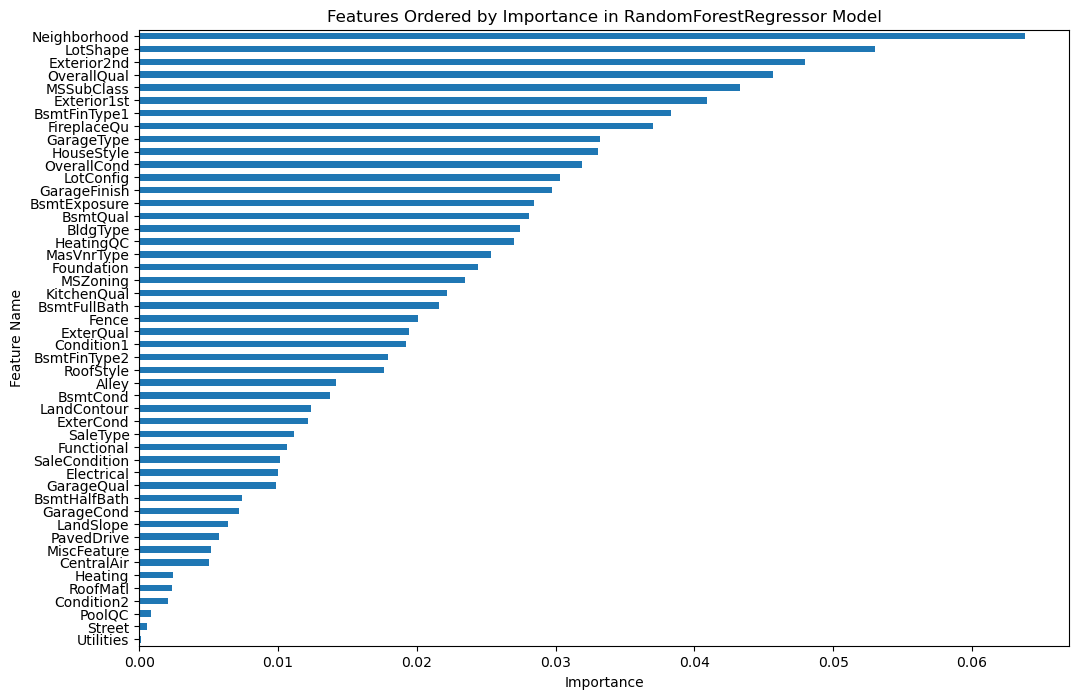

In [22]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title(f'Features Ordered by Importance in RandomForestRegressor Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 